In [0]:
# KNN model for heart disease

In [73]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [74]:
heart = pd.read_csv("Data/heart.csv")

In [75]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [76]:
row_to_drop = [449]
heart.drop(row_to_drop, axis= 0, inplace= True)

In [77]:
heart['HeartDisease'] = heart['HeartDisease'].astype('category')
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             917 non-null    int64   
 1   Sex             917 non-null    object  
 2   ChestPainType   917 non-null    object  
 3   RestingBP       917 non-null    int64   
 4   Cholesterol     917 non-null    int64   
 5   FastingBS       917 non-null    int64   
 6   RestingECG      917 non-null    object  
 7   MaxHR           917 non-null    int64   
 8   ExerciseAngina  917 non-null    object  
 9   Oldpeak         917 non-null    float64 
 10  ST_Slope        917 non-null    object  
 11  HeartDisease    917 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 87.0+ KB


In [78]:
heart.dropna(inplace=True)
heart.reset_index(drop=True, inplace=True)

In [79]:
dummies = pd.get_dummies(heart["Sex"])
dummies.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [80]:
heart["Sex"] = dummies["F"]
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [81]:
dummies= pd.get_dummies(heart["RestingECG"], prefix = "ECG")
dummies.head()

,ECG_LVH,ECG_Normal,ECG_ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [82]:
pd.concat([heart, dummies], axis = 1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0
913,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,0
914,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,0
915,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [83]:
dummies = pd.get_dummies(heart["ExerciseAngina"])
dummies.head()

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [84]:
heart["ExerciseAngina"] = dummies["N"]
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,1,0.0,Up,0


In [85]:
dummies = pd.get_dummies(heart["ChestPainType"])
dummies.head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [86]:
pd.concat([heart, dummies], axis = 1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,ATA,140,289,0,Normal,172,1,0.0,Up,0,0,1,0,0
1,49,1,NAP,160,180,0,Normal,156,1,1.0,Flat,1,0,0,1,0
2,37,0,ATA,130,283,0,ST,98,1,0.0,Up,0,0,1,0,0
3,48,1,ASY,138,214,0,Normal,108,0,1.5,Flat,1,1,0,0,0
4,54,0,NAP,150,195,0,Normal,122,1,0.0,Up,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,0,TA,110,264,0,Normal,132,1,1.2,Flat,1,0,0,0,1
913,68,0,ASY,144,193,1,Normal,141,1,3.4,Flat,1,1,0,0,0
914,57,0,ASY,130,131,0,Normal,115,0,1.2,Flat,1,1,0,0,0
915,57,1,ATA,130,236,0,LVH,174,1,0.0,Flat,1,0,1,0,0


In [87]:
dummies = pd.get_dummies(heart["ST_Slope"])
dummies.head()

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [88]:
pd.concat([heart, dummies], axis = 1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Down,Flat,Up
0,40,0,ATA,140,289,0,Normal,172,1,0.0,Up,0,0,0,1
1,49,1,NAP,160,180,0,Normal,156,1,1.0,Flat,1,0,1,0
2,37,0,ATA,130,283,0,ST,98,1,0.0,Up,0,0,0,1
3,48,1,ASY,138,214,0,Normal,108,0,1.5,Flat,1,0,1,0
4,54,0,NAP,150,195,0,Normal,122,1,0.0,Up,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,0,TA,110,264,0,Normal,132,1,1.2,Flat,1,0,1,0
913,68,0,ASY,144,193,1,Normal,141,1,3.4,Flat,1,0,1,0
914,57,0,ASY,130,131,0,Normal,115,0,1.2,Flat,1,0,1,0
915,57,1,ATA,130,236,0,LVH,174,1,0.0,Flat,1,0,1,0


In [89]:
heart_update=pd.get_dummies(heart,columns=["RestingECG", "Sex", "ExerciseAngina", "ChestPainType", "ST_Slope"])

In [90]:
import sklearn 
from sklearn.neighbors import KNeighborsClassifier as KNN 

In [103]:
target=heart_update["HeartDisease"]
input_columns =heart_update.loc[:, heart_update.columns != "HeartDisease"]

In [104]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,random_state = 42)

In [105]:
k = 200
my_KNN_model = KNN(n_neighbors=k)

In [106]:
my_KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [107]:
y_hat = my_KNN_model.predict(x_test)

In [108]:
y_hat

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1])

In [109]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [115]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

TypeError: Object with dtype category cannot perform the numpy op subtract

<AxesSubplot:>

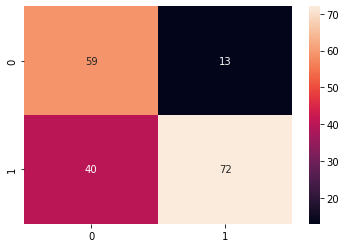

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [100]:
#SVM is more accurate

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svclassifier = SVC()

In [167]:
parameters = {'kernel':('rbf', 'linear', 'sigmoid'), 'degree' : (1,8,9), 'C':[7, 8]}
grid = GridSearchCV(svclassifier, parameters) # model

In [0]:
grid.fit(x_train, y_train)
grid.best_params_

In [170]:
svcclassifier = SVC(C = 7, degree = 1, kernel = 'linear')

In [171]:
svcclassifier.fit(x_train, y_train)

SVC(C=7, degree=1, kernel='linear')

In [172]:
y_hat = svcclassifier.predict(x_test)
y_hat

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [173]:
y_test = y_test.astype('int')

In [174]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test) 
print(mean_squared_error)

0.11956521739130435


<AxesSubplot:>

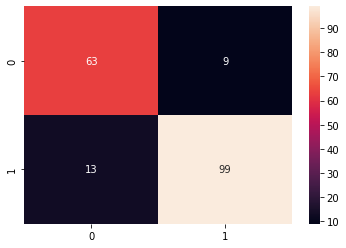

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [176]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [177]:
accuracy_score(y_test, y_hat)

0.8804347826086957

In [178]:
recall_score(y_test, y_hat)

0.8839285714285714

In [179]:
f1_score(y_test, y_hat)

0.8999999999999999